In [3]:
# This is an analysis of fosile fuel commodity prices from 1980 to 2016. I was looking to see if the prices of crude oil,
# coal, and natural gas were correlated. First I imported the necessary python modules to perform my analysis.

import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.pyplot import figure
import seaborn as sns


In [4]:
# I then imported the data from https://www.kaggle.com/vagifa/usa-commodity-prices, loaded it into into a pandas dataframe,
# and examined the column information.

commodity_prices = pd.read_csv(r"C:\Users\jcfur\Downloads\commodities\commodity-prices-2016.csv", sep=",")
print(commodity_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 64 columns):
 #   Column                                                           Non-Null Count  Dtype  
---  ------                                                           --------------  -----  
 0   Date                                                             434 non-null    object 
 1   All Commodity Price Index                                        290 non-null    float64
 2   Non-Fuel Price Index                                             302 non-null    float64
 3   Food and Beverage Price Index                                    302 non-null    float64
 4   Food Price Index                                                 302 non-null    float64
 5   Beverage Price Index                                             434 non-null    float64
 6   Industrial Inputs Price Index                                    434 non-null    float64
 7   Agricultural Raw Materials Index            

In [5]:
# To get an idea of what the data looked like, I printed the first 5 rows of each column.

print(commodity_prices.head())

         Date  All Commodity Price Index  Non-Fuel Price Index  \
0  1980-01-01                        NaN                   NaN   
1  1980-02-01                        NaN                   NaN   
2  1980-03-01                        NaN                   NaN   
3  1980-04-01                        NaN                   NaN   
4  1980-05-01                        NaN                   NaN   

   Food and Beverage Price Index  Food Price Index  Beverage Price Index  \
0                            NaN               NaN            189.310021   
1                            NaN               NaN            190.387928   
2                            NaN               NaN            194.060355   
3                            NaN               NaN            186.137888   
4                            NaN               NaN            185.070241   

   Industrial Inputs Price Index  Agricultural Raw Materials Index  \
0                      81.889650                         78.900146   
1     

In [6]:
# Because I took this dataset directly from the internet, I was not certain that it would not contain duplicates. I checked
# here and found none.
commodity_prices.duplicated().sum()

0

In [7]:
# To simplify the graphing process, I created a column that just had the month and year portions of the "Date" column.
# I then printed the column information for the dataframe to ensure it had worked.

commodity_prices["Date"] = pd.to_datetime(commodity_prices["Date"])
commodity_prices["Month/Year"] = commodity_prices["Date"].dt.strftime("%m/%Y")
print(commodity_prices.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434 entries, 0 to 433
Data columns (total 65 columns):
 #   Column                                                           Non-Null Count  Dtype         
---  ------                                                           --------------  -----         
 0   Date                                                             434 non-null    datetime64[ns]
 1   All Commodity Price Index                                        290 non-null    float64       
 2   Non-Fuel Price Index                                             302 non-null    float64       
 3   Food and Beverage Price Index                                    302 non-null    float64       
 4   Food Price Index                                                 302 non-null    float64       
 5   Beverage Price Index                                             434 non-null    float64       
 6   Industrial Inputs Price Index                                    434 non-null    f

In [8]:
# I double-checked the new Month/Year column by printing it directly.
print(commodity_prices['Month/Year'])

0      01/1980
1      02/1980
2      03/1980
3      04/1980
4      05/1980
        ...   
429    10/2015
430    11/2015
431    12/2015
432    01/2016
433    02/2016
Name: Month/Year, Length: 434, dtype: object


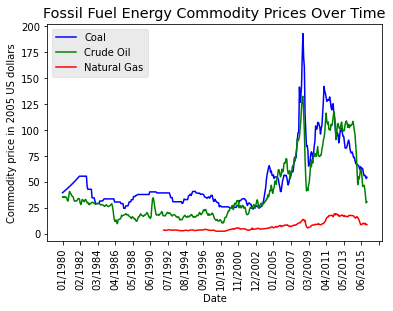

<Figure size 1920x1080 with 0 Axes>

In [9]:
# Starting my analysis, I created a line plot of the prices of coal, an adverage of three crude oil spot prices, and the price of
#liquified natural gas in Japan. I also modified the number of xticks, as they were unreadable at the default frequency.

from matplotlib.ticker import MaxNLocator
from matplotlib import ticker

fig, ax = plt.subplots()
ax.plot(commodity_prices['Month/Year'], commodity_prices['Coal'], color='b', label='Coal')
ax.plot(commodity_prices['Month/Year'], commodity_prices['Crude Oil - petroleum-simple average of three spot prices'], color='g', label='Crude Oil')
ax.plot(commodity_prices['Month/Year'], commodity_prices['Natural Gas - Indonesian Liquefied Natural Gas in Japan'], color='r', label='Natural Gas')
xticks = ticker.MaxNLocator(20)
ax.xaxis.set_major_locator(xticks)
plt.xticks(rotation = 90)
ax.set_xlabel('Date')
ax.set_ylabel('Commodity price in 2005 US dollars')
plt.style.use('ggplot')
plt.title('Fossil Fuel Energy Commodity Prices Over Time')
figure(figsize=(16, 9), dpi=120)
leg = ax.legend()
plt.show()

In [10]:
#The line graph seemed to indicate that their may be a correlation between the three fuels, so I used pandas to check the
# Pearson correlation.

corr_list = list(['Coal', 'Crude Oil - petroleum-simple average of three spot prices', 'Natural Gas - Indonesian Liquefied Natural Gas in Japan'])
corr1 = commodity_prices[corr_list].corr()
print(corr1)

                                                        Coal  \
Coal                                                1.000000   
Crude Oil - petroleum-simple average of three s...  0.897928   
Natural Gas - Indonesian Liquefied Natural Gas ...  0.784001   

                                                    Crude Oil - petroleum-simple average of three spot prices  \
Coal                                                                                         0.897928           
Crude Oil - petroleum-simple average of three s...                                           1.000000           
Natural Gas - Indonesian Liquefied Natural Gas ...                                           0.923207           

                                                    Natural Gas - Indonesian Liquefied Natural Gas in Japan  
Coal                                                                                         0.784001        
Crude Oil - petroleum-simple average of three s...                    

(array([0.5, 1.5, 2.5]),
 [Text(0.5, 0, 'Coal'),
  Text(1.5, 0, 'Natural Gas - Indonesian Liquefied Natural Gas in Japan'),
  Text(2.5, 0, 'Crude Oil - petroleum-simple average of three spot prices')])

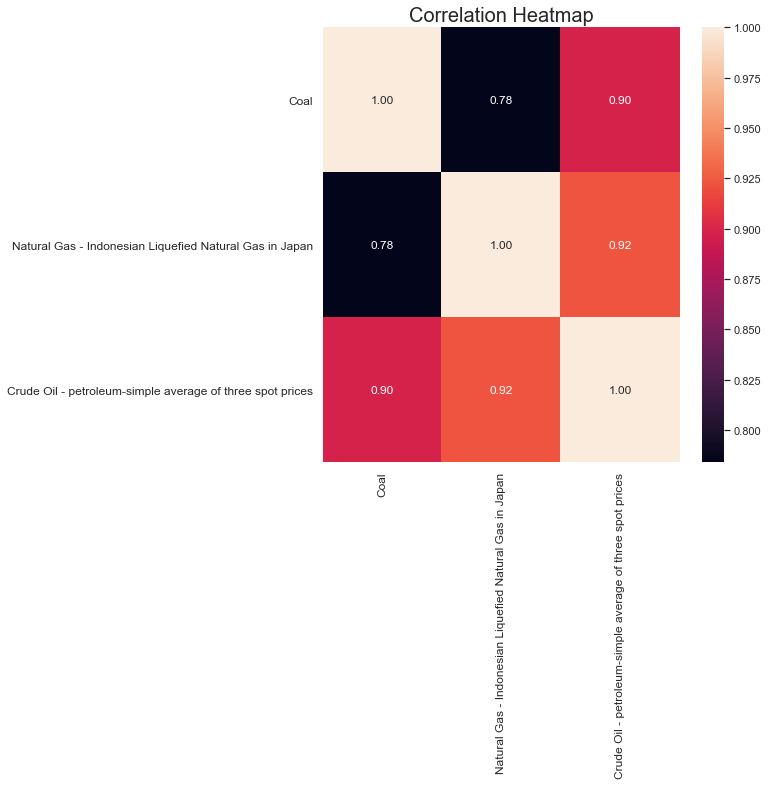

In [11]:
#Seeing that there was a correlation, I decided to construct a better visual in seaborn. The heat map below shows the strenth
# of the correlation between the three fuels' prices.

sns.set(font_scale=1)

fig, ax = plt.subplots(1, figsize=(8,8))
sns.heatmap(commodity_prices[["Coal", "Natural Gas - Indonesian Liquefied Natural Gas in Japan", 
                          "Crude Oil - petroleum-simple average of three spot prices"]].corr(), annot=True, fmt=",.2f")
plt.title("Correlation Heatmap", fontsize=20)
plt.tick_params(labelsize=12)
plt.xticks(rotation=90)

In [26]:
# Finally, I performed a T test on all three variables to confirm that the results were statistically significant. 
# P<.05 for all 3.
from scipy import stats
ttest1 = stats.ttest_rel(commodity_prices.dropna()['Coal'], commodity_prices.dropna()['Crude Oil - petroleum-simple average of three spot prices'])
ttest2 = stats.ttest_rel(commodity_prices.dropna()['Coal'], commodity_prices.dropna()['Natural Gas - Indonesian Liquefied Natural Gas in Japan'])
ttest3 = stats.ttest_rel(commodity_prices.dropna()['Crude Oil - petroleum-simple average of three spot prices'], commodity_prices.dropna()['Natural Gas - Indonesian Liquefied Natural Gas in Japan'])
print(ttest1, ttest2, ttest3)

Ttest_relResult(statistic=10.372925559011849, pvalue=1.22637261668235e-21) Ttest_relResult(statistic=28.361135173335587, pvalue=1.7220322129756563e-85) Ttest_relResult(statistic=23.890703635140067, pvalue=2.1934831842076496e-70)


In [20]:
# In conclusion, there is a strong correlation between the price of crude oil and the price of coal. There is a weaker
# correlation between the price of natural gas the the price of coal and crude oil, though it is still strong. All correlations
# were statistically significant. This could be useful in predicting future price fluctuatins of these commodities.